# Import libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\intern_projects\archive(15)\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Exploratory Data Analysis

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Basic statistics of numeric columns
numeric_stats = df.describe()
numeric_stats

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Columns with missing values and their counts
missing_values = df.isnull().sum()
print(missing_values)


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 0


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [8]:
# Remove duplicates and update the DataFrame
df.drop_duplicates(keep='first', inplace=True)


In [8]:
# Get the number of unique values in each column
unique_values_count = df.nunique()

unique_values_count

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

# Visualization

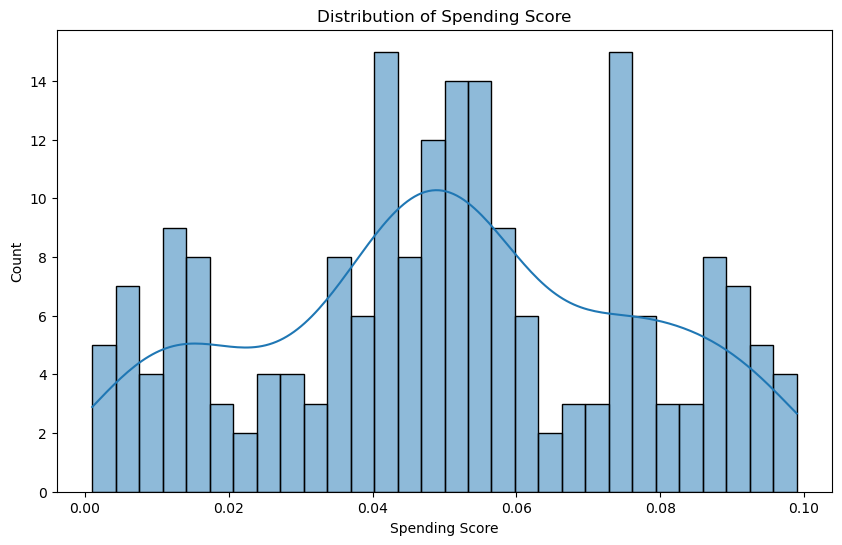

In [13]:
# Distribution of Track Durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'] / 1000, bins=30, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()


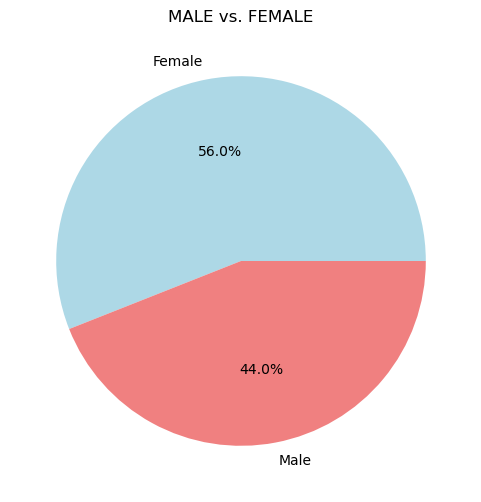

In [14]:
# Explicit vs. Non-Explicit Songs
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('MALE vs. FEMALE')
plt.ylabel('')
plt.show()


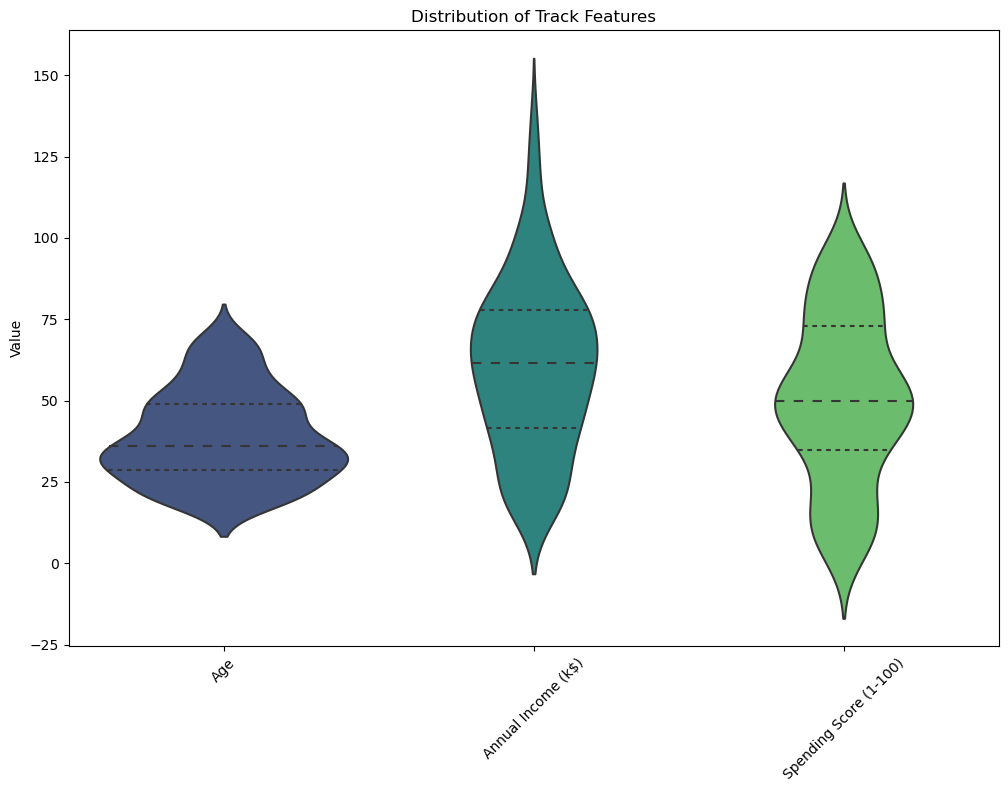

In [15]:
# Selecting relevant features for visualization
selected_features = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

# Violin plots for selected track features
plt.figure(figsize=(12, 8))
sns.violinplot(data=selected_features, palette='viridis', inner='quartile')
plt.title('Distribution of Track Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


# Unsupervised Models

## K-means clustering of songs

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

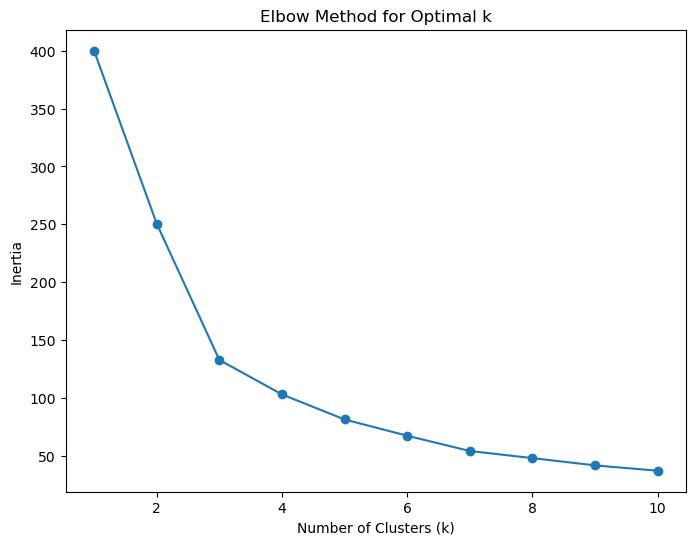

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster
0    76
1    62
2    62
Name: count, dtype: int64


In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Selecting relevant features for clustering
features_for_clustering = df[['Age','Annual Income (k$)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(scaled_features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(imputed_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow curve, choose the optimal number of clusters
# Let's say k=5
k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(imputed_features)

# Add the 'Cluster' column to the DataFrame
df['Cluster'] = clusters

# Print the number of songs in each cluster
print(df['Cluster'].value_counts())

In [20]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


3 clusters based on elbow method it looks like.

## Recommendation System

In [67]:
# Function to recommend similar songs based on track features
def recommend_similar_songs(mode, top_n=5):
    song_features = df[df['Danceability'] == mode][['Energy', 'Valence', 'Acousticness', 'Instrumentalness']]
    if len(song_features) == 0:
        print("Song not found in the dataset.")
        return

    # Calculate the Euclidean distance between the selected song and all other songs
    distances = np.sqrt(np.sum((features_for_clustering - song_features.values[0])**2, axis=1))

    # Get the indices of the most similar songs
    similar_song_indices = np.argsort(distances)[1:top_n + 1]

    # Display the recommended similar songs
    print(f"Recommended Songs Similar to '{mode}':")
    a=[]
    for idx in similar_song_indices:
        
        recommended_song = df.iloc[idx]['Track Name']
        print(f"- {recommended_song}")
        a.append(recommended_song)
    print(a)




In [73]:
# Usage example:
# Let's recommend 5 songs similar to the track "Justified & Ancient - Stand by the Jams"
recommend_similar_songs(0.51, top_n=10)

Recommended Songs Similar to '0.51':
- You've Got To Hide Your Love Away
- Down Among The Dead Men
- Young Turks - 2008 Remaster
- Smooth Criminal - 2012 Remaster
- B.O.T.A. (Baddest Of Them All) - Edit
- William Tell
- Abergavenny
- Touch Me (Radio Edit)
- Axel F
- Wipe Out
["You've Got To Hide Your Love Away", 'Down Among The Dead Men', 'Young Turks - 2008 Remaster', 'Smooth Criminal - 2012 Remaster', 'B.O.T.A. (Baddest Of Them All) - Edit', 'William Tell', 'Abergavenny', 'Touch Me (Radio Edit)', 'Axel F', 'Wipe Out']


# Supervised Models

## Predicting Song Popularity using Regression

### Linear Regression

In [25]:
# Selecting relevant features for prediction
features_for_prediction = df[['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness']]

# Target variable: Popularity
target = df['Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_for_prediction, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r_squared}")

# Optional: Print the coefficients of the model
print("Model Coefficients:")
for feature, coefficient in zip(features_for_prediction.columns, model.coef_):
    print(f"{feature}: {coefficient}")


Mean Squared Error (MSE): 872.06429073485
R-squared (R2): 0.0008905006208617117
Model Coefficients:
Danceability: 16.754805176586792
Energy: 0.5290389066356586
Valence: -6.062853441110534
Acousticness: -4.902046093796449
Instrumentalness: -8.947630246696782


### Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred_rf = rf_model.predict(X_test)

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared (R2): {r_squared_rf}")


Random Forest - Mean Squared Error (MSE): 937.159421685308
Random Forest - R-squared (R2): -0.073687904190471


### Gradient Boosting Regressor

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred_gb = gb_model.predict(X_test)

# Model evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r_squared_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting - R-squared (R2): {r_squared_gb}")


Gradient Boosting - Mean Squared Error (MSE): 881.1592259857075
Gradient Boosting - R-squared (R2): -0.009529414862333718


### Support Vector Regression 

In [28]:
from sklearn.svm import SVR

# Create and train the Support Vector Regression model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred_svr = svr_model.predict(X_test)

# Model evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r_squared_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - Mean Squared Error (MSE): {mse_svr}")
print(f"SVR - R-squared (R2): {r_squared_svr}")


SVR - Mean Squared Error (MSE): 901.5361052215347
SVR - R-squared (R2): -0.03287486522478478


## Genre Classification

In [29]:
# Selecting relevant features for genre classification
features_for_genre = df[['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness']]

# Target variable: Genre
target_genre = df['Artist Genres']

# Handle missing values in the 'Artist Genres' column
target_genre.fillna('Unknown', inplace=True)

# Encode the genre labels (convert genre names to numeric labels)
label_encoder = LabelEncoder()
target_genre_encoded = label_encoder.fit_transform(target_genre)

# Split the data into training and testing sets
X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(
    features_for_genre, target_genre_encoded, test_size=0.2, random_state=42
)

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_genre, y_train_genre)

# Predict genre labels on the test set
y_pred_genre = rf_classifier.predict(X_test_genre)

# Decode the numeric genre labels back to genre names
y_pred_genre_decoded = label_encoder.inverse_transform(y_pred_genre)
y_test_genre_decoded = label_encoder.inverse_transform(y_test_genre)

# Model evaluation
accuracy = accuracy_score(y_test_genre_decoded, y_pred_genre_decoded)
classification_report_str = classification_report(y_test_genre_decoded, y_pred_genre_decoded)
conf_matrix = confusion_matrix(y_test_genre_decoded, y_pred_genre_decoded)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\

In [30]:
print(f"Accuracy: {accuracy}")
# print("Classification Report:")
# print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.15433896330809552
Confusion Matrix:
[[20  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
